# Vectorisation Bag of Words (BoW) avec CountVectorizer et classification avec LogisticRegression

In [1]:
from common.text_classification_utils import *

dataset = load_dataset()

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,zrkrwmgseetfegaozv kovx vh,0,0,0,1
1,Comment puis-je me rendre de l'aéroport de CHA...,1,0,0,0
2,4f3;S0`HsL# hL8ydlwlM2cK7=,0,0,0,1
3,"u*]P\UsbAr,CoDnDdr*-GKN(0O",0,0,0,1
4,J'aimerais connaître le chemin pour aller de S...,1,0,0,0
...,...,...,...,...,...
1302960,Il a prétendu être mon ami.,0,0,1,0
1302961,I am planning a trip from saint paul les dax t...,0,1,0,0
1302962,Go from the train station of Loches to Venarey...,0,1,0,0
1302963,Je souhaiterais aller à verneuil sur serre dep...,1,0,0,0


In [2]:
labels, id2label, label2id = prepare_labels(dataset)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


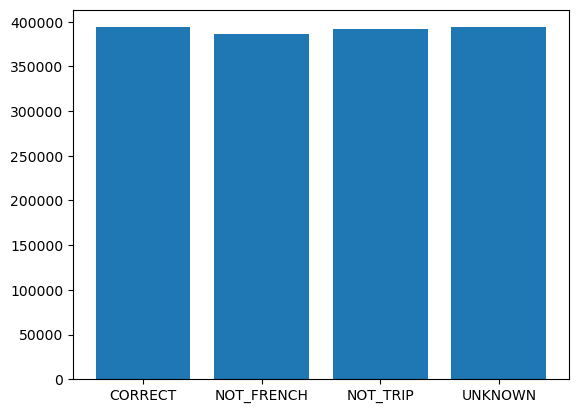

In [3]:
show_labels_distribution(dataset, labels)

# Split du dataset en train, test et validation

In [4]:
X_train, X_test, X_val, y_train, y_test, y_val = split_dataset(dataset, labels)

In [5]:
X_train.values

array(["Le départ de l'aéroport de LANGRES-GENDARMERIE est imminent.",
       'Find a way to leave the train station of le buisson de cadouin.',
       "Trace un parcours de Dinan jusqu'à Font-Romeu-Odeillo-Via, pour trouver Ana-Paula.",
       ..., "L'arrivée à BEAUVOIR-SUR-NIORT est prévue.",
       'Go from the city of bueil to rambervillers.',
       'I want to arrive at Bordeaux.'], dtype=object)

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

# Utilisation d'un pipeline SKLearn (vectorizer + classifier LogisticRegression avec OneVsRestClassifier pour la classification multi-label)

In [6]:
from sklearn.linear_model import LogisticRegression

pipeline = create_pipeline(
    CountVectorizer(),
    LogisticRegression(),
)

pipeline.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

# Evaluation du modèle, métriques

In [7]:
y_pred = pipeline.predict(X_test)

show_classification_report(y_pred, y_test, labels)

Classification Report for 
              precision    recall  f1-score   support

     CORRECT       1.00      1.00      1.00     15811
  NOT_FRENCH       1.00      0.98      0.99     15454
    NOT_TRIP       1.00      0.98      0.99     15859
     UNKNOWN       0.98      1.00      0.99     15676

   micro avg       0.99      0.99      0.99     62800
   macro avg       0.99      0.99      0.99     62800
weighted avg       0.99      0.99      0.99     62800
 samples avg       0.99      0.99      0.99     62800


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


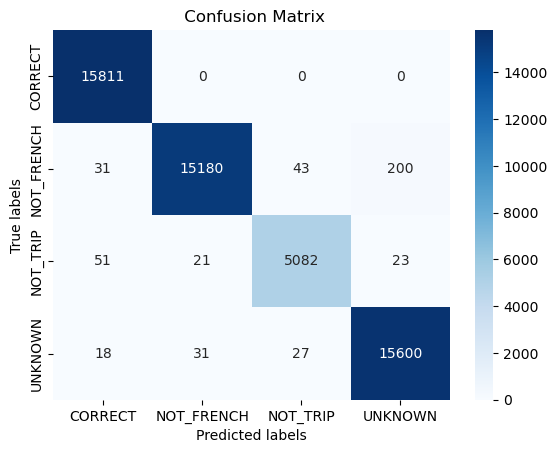

In [8]:
show_confusion_matrix(y_pred, y_test, labels)

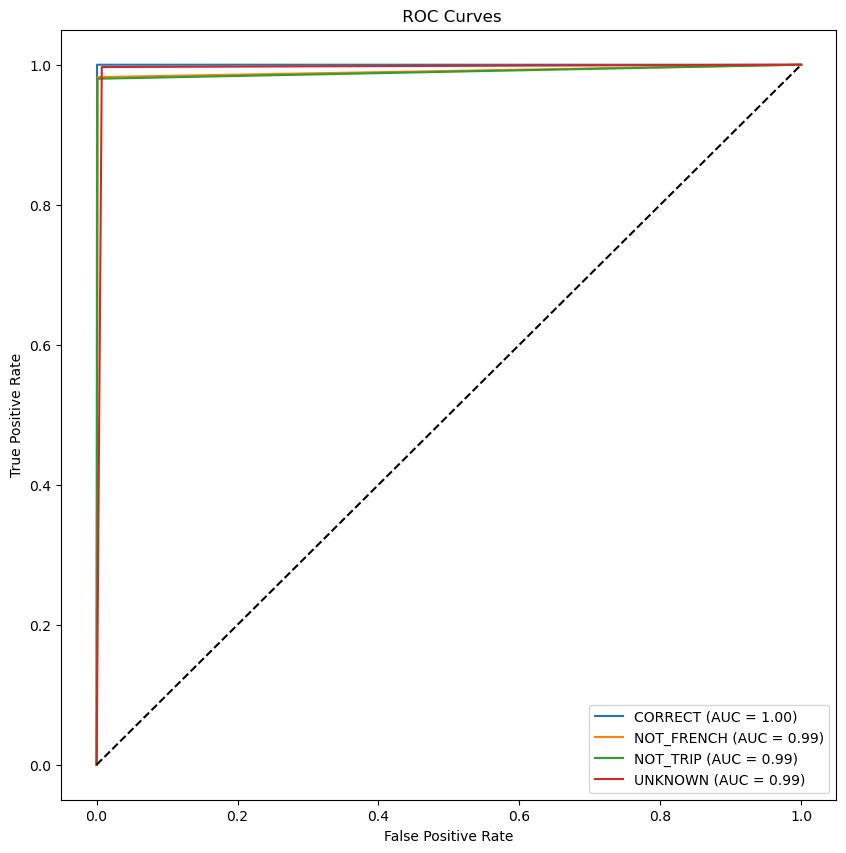

In [9]:
show_roc_curves(labels, y_pred, y_test)

In [10]:
show_samples_predictions(pipeline, id2label)

* Je veux aller de Port-Boulet à Le Havre.
 - CORRECT => 95.6%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 17.2%
 - UNKNOWN => 0.0%

* Je veux aller de Port-Boulet au Havre.
 - CORRECT => 61.7%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 10.2%
 - UNKNOWN => 0.0%

* Je vais de Nantes à Paris.
 - CORRECT => 98.8%
 - NOT_FRENCH => 0.1%
 - NOT_TRIP => 1.3%
 - UNKNOWN => 0.0%

* Je vais de Nantes à Nantes.
 - CORRECT => 98.7%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 1.1%
 - UNKNOWN => 0.1%

* Je veux aller de Nantes à Nantes.
 - CORRECT => 99.2%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 3.8%
 - UNKNOWN => 0.0%

* Je vais à Port-Boulet en partant de Le Havre
 - CORRECT => 99.9%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* Je vais à Port-Boulet en partant du Havre
 - CORRECT => 86.6%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.1%
 - UNKNOWN => 0.0%

* Peux-tu m'aider à trouver mon chemin vers Paris en partant d'Épierre ?
 - CORRECT => 100.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

### Le classifier semble moins certain qu'avec MultinomialDB pour prédire des phrases simples NOT_TRIP ("Je veux aller au cinéma") ou CORRECT ("Nantes à Toulouse")